<center>

## Group 12 

</center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('WordNetLemmatizer')
nltk.download("wordnet")
from nltk.corpus import stopwords 
from nltk.tokenize import WordPunctTokenizer
from string import punctuation
from nltk.stem import WordNetLemmatizer
import regex

[nltk_data] Downloading package stopwords to /Users/dtal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading WordNetLemmatizer: Package
[nltk_data]     'WordNetLemmatizer' not found in index
[nltk_data] Downloading package wordnet to /Users/dtal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<center>

### Loading the data
    
</center>

In [2]:
# Load the dataset from CSV
data = pd.read_csv('/Users/dtal/Downloads/archive/ireland-news-headlines.csv')

<center>

### Data Exploration

</center>


In [3]:
print("Shape of the DataFrame: ", data.shape)
print("Number of duplicates: ", data.duplicated().sum())

Shape of the DataFrame:  (1611495, 3)
Number of duplicates:  0


In [4]:
# number of nulls
data.isna().sum()

publish_date         0
headline_category    0
headline_text        7
dtype: int64

In [5]:
# Print the first few rows to check the data
display(data.head())

,publish_date,headline_category,headline_text
0,19960102,news,UUP sees possibility of voting Major out
1,19960102,news,Pubs targeted as curbs on smoking are extended
2,19960102,news,Papers reveal secret links with O'Neill cabinet
3,19960102,news,Domestic chaos as Italy takes EU presidency
4,19960102,news,Learning about the star to which we owe life


In [6]:
# Get information about the dataset, such as column names and data types
display(data.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611495 entries, 0 to 1611494
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   publish_date       1611495 non-null  int64 
 1   headline_category  1611495 non-null  object
 2   headline_text      1611488 non-null  object
dtypes: int64(1), object(2)
memory usage: 36.9+ MB


None

In [7]:
# Summary statistics of the dataset
display(data.describe())

,publish_date
count,1.611495e+06
mean,2.008336e+07
std,7.109984e+04
min,1.996010e+07
25%,2.002091e+07
50%,2.008111e+07
75%,2.014101e+07
max,2.021063e+07


<center>

### Cleaning the data for vizualizations

</center>

In [8]:
# Separating the year, month and day into 3 other columns.

year = [] 
month = [] 
day = [] 

dates = data.publish_date.values

for date in dates:
    str_date = list(str(date))
    year.append(int("".join(str_date[0:4]))) 
    month.append(int("".join(str_date[4:6])))
    day.append(int("".join(str_date[6:8])))

data['year'] = year
data['month'] = month
data['day'] = day

data.drop(['publish_date'] , axis=1,inplace=True) 

In [9]:
data.head()

,headline_category,headline_text,year,month,day
0,news,UUP sees possibility of voting Major out,1996,1,2
1,news,Pubs targeted as curbs on smoking are extended,1996,1,2
2,news,Papers reveal secret links with O'Neill cabinet,1996,1,2
3,news,Domestic chaos as Italy takes EU presidency,1996,1,2
4,news,Learning about the star to which we owe life,1996,1,2


In [10]:
print('Unique Headlines Categories: {}'.format(len(data.headline_category.unique())))


Unique Headlines Categories: 103


In [11]:
set([category for category in data.headline_category if "." not in category] ) 

{'business', 'culture', 'lifestyle', 'news', 'opinion', 'sport'}

In [12]:
data.headline_category = data.headline_category.apply(lambda x: x.split(".")[0]) 

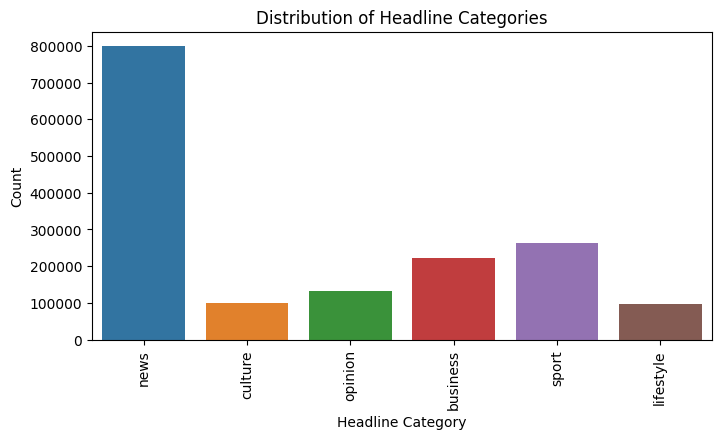

In [13]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=data, x='headline_category')
plt.xticks(rotation=90)
plt.xlabel('Headline Category')
plt.ylabel('Count')
plt.title('Distribution of Headline Categories')
plt.show()

In [14]:
wordnet_lemmatizer = WordNetLemmatizer()

stop = stopwords.words('english')

for punct in punctuation:
    stop.append(punct)

def filter_text(text, stop_words):
    if pd.isnull(text):  # Check for missing values
        return ""
    word_tokens = WordPunctTokenizer().tokenize(text.lower())
    filtered_text = [regex.sub(u'\p{^Latin}', u'', w) for w in word_tokens if w.isalpha()]
    filtered_text = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in filtered_text if not w in stop_words] 
    return " ".join(filtered_text)

In [15]:
data["filtered_text"] = data['headline_text'].apply(lambda x : filter_text(x, stop)) 

In [16]:
data.head()

,headline_category,headline_text,year,month,day,filtered_text
0,news,UUP sees possibility of voting Major out,1996,1,2,uup see possibility vote major
1,news,Pubs targeted as curbs on smoking are extended,1996,1,2,pubs target curb smoke extend
2,news,Papers reveal secret links with O'Neill cabinet,1996,1,2,paper reveal secret link neill cabinet
3,news,Domestic chaos as Italy takes EU presidency,1996,1,2,domestic chaos italy take eu presidency
4,news,Learning about the star to which we owe life,1996,1,2,learn star owe life


<center>

### Relevant Visualization

</center>


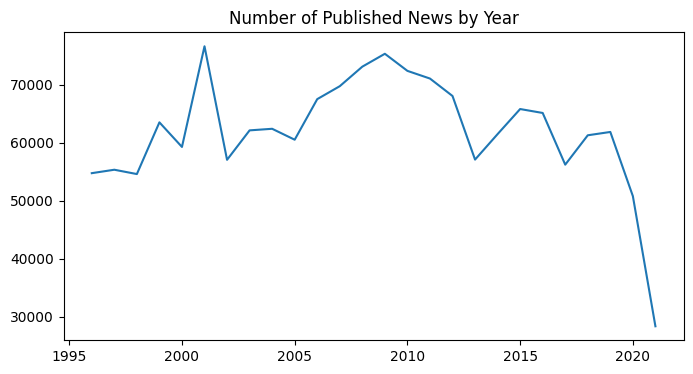

In [17]:
plt.figure(figsize=(8,4))
ax = sns.lineplot(x=data.year.value_counts().index.values,y=data.year.value_counts().values)
ax = plt.title('Number of Published News by Year')

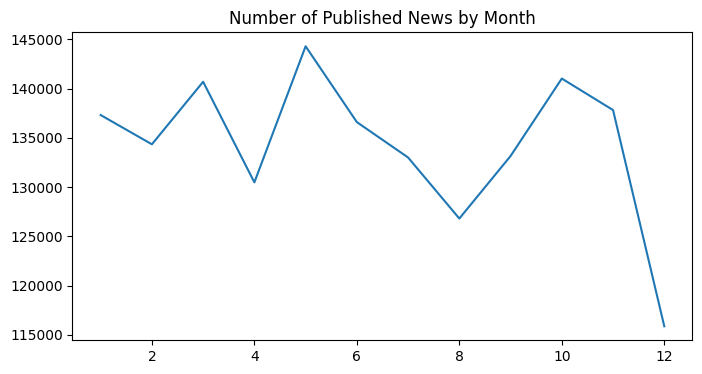

In [18]:
plt.figure(figsize=(8,4))
ax = sns.lineplot(x=data.month.value_counts().index.values,y=data.month.value_counts().values)
ax = plt.title('Number of Published News by Month')

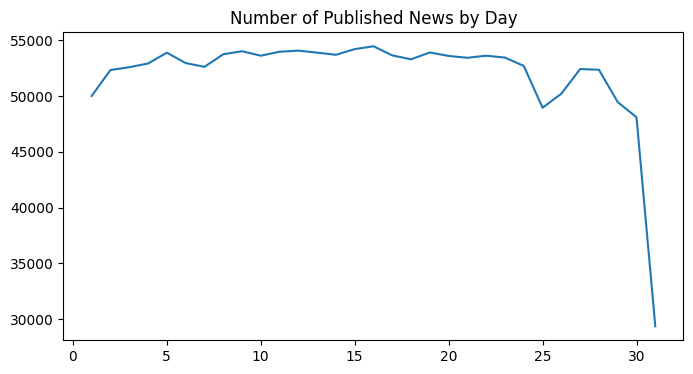

In [19]:
plt.figure(figsize=(8,4))
ax = sns.lineplot(x=data.day.value_counts().index.values,y=data.day.value_counts().values)
ax = plt.title('Number of Published News by Day')

In [20]:
from wordcloud import WordCloud

def make_wordcloud(words,title):
    cloud = WordCloud(width=1920, height=1080,max_font_size=200, max_words=300, background_color="white").generate(words)
    plt.figure(figsize=(8,4))
    plt.imshow(cloud, interpolation="gaussian")
    plt.axis("off") 
    plt.title(title, fontsize=60)
    plt.show()

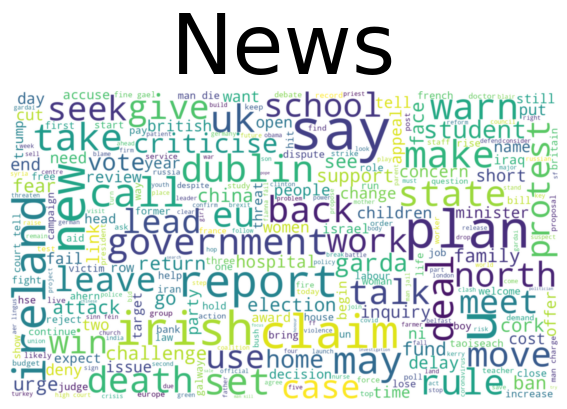

In [21]:
all_text = " ".join(data[data.headline_category == "news"].filtered_text) 
make_wordcloud(all_text, "News") 

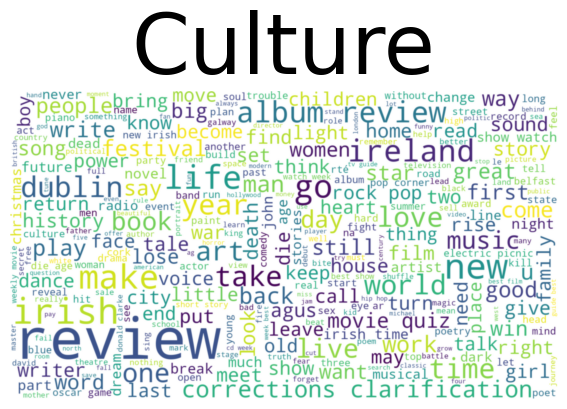

In [22]:
all_text = " ".join(data[data.headline_category == "culture"].filtered_text) 
make_wordcloud(all_text, "Culture")

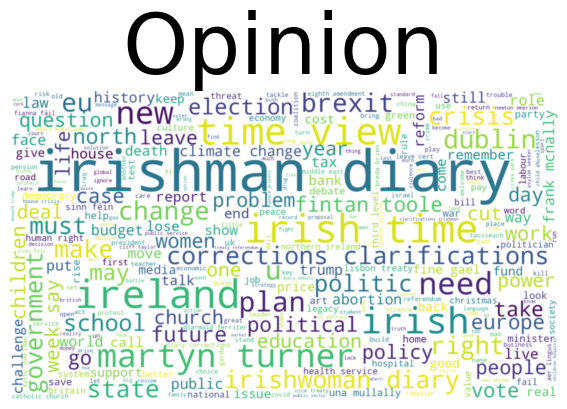

In [23]:
all_text = " ".join(data[data.headline_category == "opinion"].filtered_text) 
make_wordcloud(all_text, "Opinion")

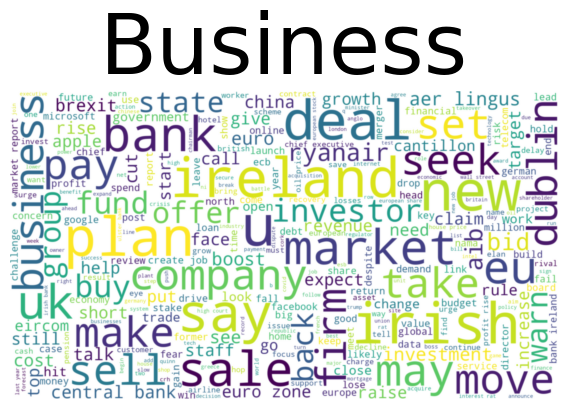

In [24]:
all_text = " ".join(data[data.headline_category == "business"].filtered_text) 
make_wordcloud(all_text, "Business")

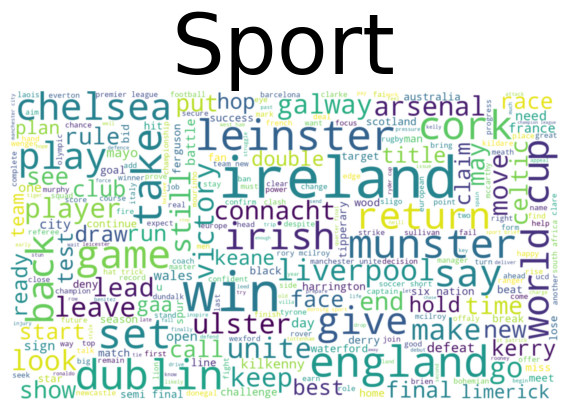

In [25]:
all_text = " ".join(data[data.headline_category == "sport"].filtered_text) 
make_wordcloud(all_text, "Sport")

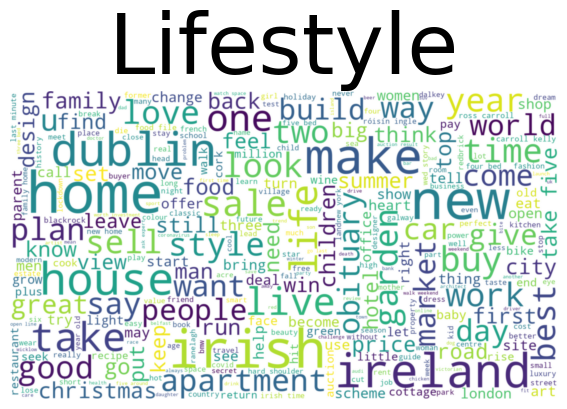

In [26]:
all_text = " ".join(data[data.headline_category == "lifestyle"].filtered_text) 
make_wordcloud(all_text, "Lifestyle")

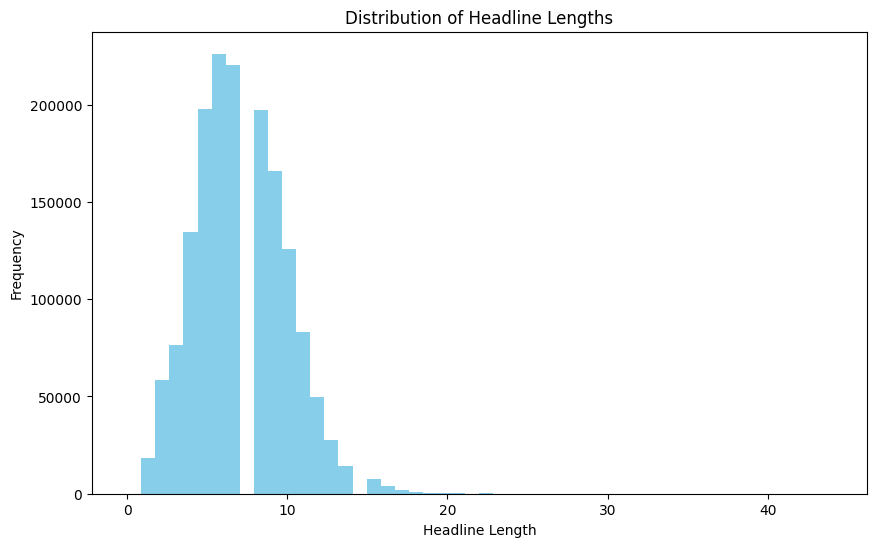

In [27]:
# Histogram of headline lengths
data['headline_length'] = data['headline_text'].astype(str).str.split().apply(lambda x: len(x) if x != ['nan'] else 0)

plt.figure(figsize=(10, 6))
plt.hist(data['headline_length'], bins=50, color='skyblue')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.title('Distribution of Headline Lengths')
plt.show()